Question 1: This module we'll be looking at the New York City tree census.

Data is available at
https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/pi5s-9p35

The Purpose of this assignment is to get familier with Dash -Ploty python

##### Loading libraries

In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import pandas as pd

##### Reading Dataset

In [5]:
env = pd.read_csv("2015StreetTreesCensus_TREES.csv") # Download and store data on local machine or directly use it from Github

In [6]:
envdata = env.iloc[:,[8,10,11,30]] ## Filtering necessary columns

##### Q1) What proportion of trees are in good,fair or poor health according to 'health' variable from dataset provided

##### Data Preprocessing and forming dictionary of key value pairs for pie-chart

In [7]:
envdata1 = env.iloc[:,[8,10,30]]
con = envdata1.groupby(['boroname','spc_common','health'])['spc_common'].count().unstack(fill_value = 0).reset_index()

con1 = envdata1.groupby(['boroname','health'])['boroname'].count().unstack(fill_value = 0).reset_index()

fnameDict = {'Plants':con["spc_common"].tolist() }

##### Dash application layout 

In [8]:
app = dash.Dash()

In [9]:
def app_layout():
    return(
            html.Div([
                    html.H1(children='Health of trees for each borough in NY!'),
                    dcc.Tabs(
                            tabs=[{'label': 'Manhattan', 'value': 1},
                                  {'label': 'Brooklyn', 'value': 2},
                                  {'label': 'Queens', 'value': 3},
                                  {'label': 'Bronx', 'value': 4},
                                  {'label': 'SI', 'value': 5}
                                  ],
                            value=1,
                            id='tabs'
                            ),
                    html.Div(id='output-tab')
                    ])
    )

app.layout=app_layout()
@app.callback(Output('output-tab', 'children'),
              [Input('tabs', 'value')])

def display_content(value):
    data = [
        {
            'labels': ['Fair','Good','Poor'] ,
            'values': [[10887,66603,3095],[25073, 138212,6459],[11460,47358,3609],[34549,194008,9417],[14535,82669,4238]][int(value)-1],
            'type': 'pie',
        },
    ]

    return html.Div([
        dcc.Graph(
            id='graph',
            figure={
                'data': data,
                'layout': {
                    'margin': {
                        'l': 30,
                        'r': 0,
                        'b': 30,
                        't': 0
                    },
                    'legend': {'x': 0, 'y': 1,'z': 2}
                }
                    
            }
        )
    ])
if __name__ == '__main__':
    app.server.run(debug=True)

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: 1

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2870: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



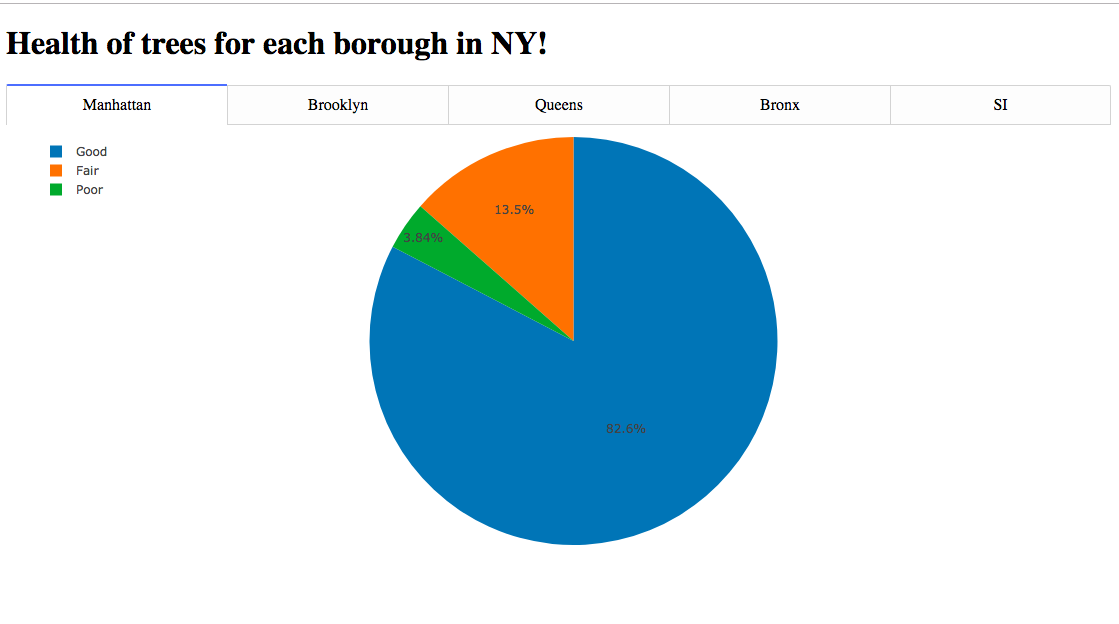

In [22]:
from IPython.display import Image
Image(filename='/Users/GD/Desktop/Borough.png')